# Análisis Estadístico: Tasa de Decisiones Informadas (TDI)

**Tesis de Ingeniería**  
**Fecha:** Octubre 2025  
**Indicador:** TDI (%) - Decisiones basadas en análisis previo

## Objetivo
Evaluar si la implementación del sistema aumentó significativamente la tasa de decisiones operativas basadas en análisis de datos.

## Estructura del Análisis

1. **Cálculo del Indicador TDI**: Porcentaje de decisiones informadas (preprueba vs postprueba)
2. **Análisis Descriptivo**: Frecuencias, análisis por tipo de decisión y responsable
3. **Visualizaciones**: Gráficos profesionales (barras, apiladas, comparativos)
4. **Análisis Inferencial**: Prueba McNemar (datos binarios pareados), intervalos de confianza
5. **Tamaño del Efecto**: h de Cohen para proporciones
6. **Interpretación**: Conclusiones estadísticas y significancia práctica

---

In [13]:
# =============================================================================
# 1. CONFIGURACIÓN INICIAL
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import mcnemar
import warnings
import os
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# Crear carpeta para resultados
os.makedirs('resultados_tdi', exist_ok=True)

print("✓ Librerías importadas correctamente")
print("✓ Configuración de visualización establecida")
print("✓ Carpeta 'resultados_tdi' creada/verificada")

✓ Librerías importadas correctamente
✓ Configuración de visualización establecida
✓ Carpeta 'resultados_tdi' creada/verificada


In [14]:
# =============================================================================
# 2. CARGA Y VALIDACIÓN DE DATOS
# =============================================================================

# Cargar datos
df_pre = pd.read_csv('data/indicador3/tdi_preprueba.csv')
df_post = pd.read_csv('data/indicador3/tdi_postprueba.csv')

# Validación de datos
print("="*80)
print("VALIDACIÓN DE DATOS")
print("="*80)

print(f"\n📊 PREPRUEBA (ANTES del sistema):")
print(f"   - Número de decisiones: {len(df_pre)}")
print(f"   - Columnas: {list(df_pre.columns)}")
print(f"   - Valores nulos: {df_pre.isnull().sum().sum()}")
print(f"   - Decisiones informadas: {df_pre['decision_informada'].sum()} / {len(df_pre)}")
print(f"   - Periodo: {df_pre['fecha'].min()} a {df_pre['fecha'].max()}")

print(f"\n📊 POSTPRUEBA (DESPUÉS del sistema):")
print(f"   - Número de decisiones: {len(df_post)}")
print(f"   - Columnas: {list(df_post.columns)}")
print(f"   - Valores nulos: {df_post.isnull().sum().sum()}")
print(f"   - Decisiones informadas: {df_post['decision_informada'].sum()} / {len(df_post)}")
print(f"   - Periodo: {df_post['fecha'].min()} a {df_post['fecha'].max()}")

# Verificar que los IDs coincidan (datos pareados)
print(f"\n🔍 VERIFICACIÓN DE PAREAMIENTO:")
ids_match = df_pre['id_decision'].equals(df_post['id_decision'])
print(f"   - IDs de decisión coinciden: {ids_match}")
if ids_match:
    print(f"   ✓ Datos correctamente pareados (mismas {len(df_pre)} decisiones antes/después)")
else:
    print(f"   ✗ ADVERTENCIA: Los IDs no coinciden perfectamente")

# Vista previa de datos
print(f"\n📋 VISTA PREVIA PREPRUEBA (primeras 5 filas):")
print(df_pre.head().to_string(index=False))

print("\n" + "="*80)
print(f"✓ Datos cargados y validados correctamente")
print(f"✓ n = {len(df_pre)} decisiones pareadas")
print("="*80)

VALIDACIÓN DE DATOS

📊 PREPRUEBA (ANTES del sistema):
   - Número de decisiones: 132
   - Columnas: ['id_decision', 'fecha', 'responsable', 'turno', 'tipo_decision', 'decision_informada']
   - Valores nulos: 0
   - Decisiones informadas: 66 / 132
   - Periodo: 2024-11-04 a 2024-12-17

📊 POSTPRUEBA (DESPUÉS del sistema):
   - Número de decisiones: 132
   - Columnas: ['id_decision', 'fecha', 'responsable', 'turno', 'tipo_decision', 'decision_informada']
   - Valores nulos: 0
   - Decisiones informadas: 111 / 132
   - Periodo: 2025-01-06 a 2025-02-18

🔍 VERIFICACIÓN DE PAREAMIENTO:
   - IDs de decisión coinciden: True
   ✓ Datos correctamente pareados (mismas 132 decisiones antes/después)

📋 VISTA PREVIA PREPRUEBA (primeras 5 filas):
id_decision      fecha responsable  turno tipo_decision  decision_informada
       D001 2024-11-04         R01 Mañana   Planificada                   1
       D002 2024-11-04         R02 Mañana     Rutinaria                   1
       D003 2024-11-04         

In [15]:
# =============================================================================
# 3. CÁLCULO DEL INDICADOR TDI (%)
# =============================================================================

# TDI = (Decisiones Informadas / Total Decisiones) × 100

n_total = len(df_pre)

# PREPRUEBA
n_informadas_pre = df_pre['decision_informada'].sum()
n_no_informadas_pre = n_total - n_informadas_pre
tdi_pre = (n_informadas_pre / n_total) * 100

# POSTPRUEBA
n_informadas_post = df_post['decision_informada'].sum()
n_no_informadas_post = n_total - n_informadas_post
tdi_post = (n_informadas_post / n_total) * 100

# MEJORA
mejora_absoluta = tdi_post - tdi_pre
mejora_porcentual = (mejora_absoluta / tdi_pre) * 100

print("\n" + "="*80)
print("CÁLCULO DEL INDICADOR TDI (Tasa de Decisiones Informadas)")
print("="*80)

print(f"\n📊 FÓRMULA:")
print(f"   TDI (%) = (Decisiones con análisis previo / Total decisiones) × 100")

print(f"\n📈 RESULTADOS:")
print(f"\n   PREPRUEBA (ANTES del sistema):")
print(f"   • Total decisiones:          {n_total}")
print(f"   • Decisiones informadas:     {n_informadas_pre}")
print(f"   • Decisiones NO informadas:  {n_no_informadas_pre}")
print(f"   • TDI PREPRUEBA:             {tdi_pre:.2f}%")

print(f"\n   POSTPRUEBA (DESPUÉS del sistema):")
print(f"   • Total decisiones:          {n_total}")
print(f"   • Decisiones informadas:     {n_informadas_post}")
print(f"   • Decisiones NO informadas:  {n_no_informadas_post}")
print(f"   • TDI POSTPRUEBA:            {tdi_post:.2f}%")

print(f"\n🎯 MEJORA OBSERVADA:")
print(f"   • Mejora absoluta:           {mejora_absoluta:+.2f} puntos porcentuales")
print(f"   • Mejora relativa:           {mejora_porcentual:+.2f}%")
print(f"   • N° decisiones mejoradas:   {n_informadas_post - n_informadas_pre:+d}")

print("\n" + "="*80)

# Tabla resumen
tabla_tdi = pd.DataFrame({
    'Fase': ['PREPRUEBA', 'POSTPRUEBA', 'MEJORA'],
    'Total Decisiones': [n_total, n_total, '-'],
    'Decisiones Informadas': [n_informadas_pre, n_informadas_post, f'+{n_informadas_post - n_informadas_pre}'],
    'Decisiones NO Informadas': [n_no_informadas_pre, n_no_informadas_post, f'{n_no_informadas_post - n_no_informadas_pre}'],
    'TDI (%)': [f"{tdi_pre:.2f}%", f"{tdi_post:.2f}%", f"+{mejora_absoluta:.2f} pp"]
})

print("\n📊 TABLA RESUMEN DEL INDICADOR TDI:")
print("="*80)
print(tabla_tdi.to_string(index=False))
print("="*80)


CÁLCULO DEL INDICADOR TDI (Tasa de Decisiones Informadas)

📊 FÓRMULA:
   TDI (%) = (Decisiones con análisis previo / Total decisiones) × 100

📈 RESULTADOS:

   PREPRUEBA (ANTES del sistema):
   • Total decisiones:          132
   • Decisiones informadas:     66
   • Decisiones NO informadas:  66
   • TDI PREPRUEBA:             50.00%

   POSTPRUEBA (DESPUÉS del sistema):
   • Total decisiones:          132
   • Decisiones informadas:     111
   • Decisiones NO informadas:  21
   • TDI POSTPRUEBA:            84.09%

🎯 MEJORA OBSERVADA:
   • Mejora absoluta:           +34.09 puntos porcentuales
   • Mejora relativa:           +68.18%
   • N° decisiones mejoradas:   +45


📊 TABLA RESUMEN DEL INDICADOR TDI:
      Fase Total Decisiones Decisiones Informadas Decisiones NO Informadas   TDI (%)
 PREPRUEBA              132                    66                       66    50.00%
POSTPRUEBA              132                   111                       21    84.09%
    MEJORA                -    

In [16]:
# =============================================================================
# 3.5. ANÁLISIS POR TIPO DE DECISIÓN
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS POR TIPO DE DECISIÓN")
print("="*80)

# Obtener tipos de decisión únicos
tipos_decision = sorted(df_pre['tipo_decision'].unique())

print(f"\n📊 TIPOS DE DECISIÓN IDENTIFICADOS: {tipos_decision}")

# Crear tabla comparativa
tabla_tipos = []

for tipo in tipos_decision:
    # Filtrar por tipo
    mask_pre = df_pre['tipo_decision'] == tipo
    mask_post = df_post['tipo_decision'] == tipo
    
    n_tipo = mask_pre.sum()
    
    # Calcular TDI por tipo
    n_inf_pre = df_pre[mask_pre]['decision_informada'].sum()
    n_inf_post = df_post[mask_post]['decision_informada'].sum()
    
    tdi_tipo_pre = (n_inf_pre / n_tipo) * 100 if n_tipo > 0 else 0
    tdi_tipo_post = (n_inf_post / n_tipo) * 100 if n_tipo > 0 else 0
    
    mejora_tipo = tdi_tipo_post - tdi_tipo_pre
    
    tabla_tipos.append({
        'Tipo Decisión': tipo,
        'N Decisiones': n_tipo,
        'Informadas PRE': n_inf_pre,
        'TDI PRE (%)': f"{tdi_tipo_pre:.2f}%",
        'Informadas POST': n_inf_post,
        'TDI POST (%)': f"{tdi_tipo_post:.2f}%",
        'Mejora (pp)': f"{mejora_tipo:+.2f}"
    })

df_tabla_tipos = pd.DataFrame(tabla_tipos)

print("\n📋 TABLA COMPARATIVA POR TIPO DE DECISIÓN:")
print("="*80)
print(df_tabla_tipos.to_string(index=False))
print("="*80)

# Identificar tipo con mayor mejora
idx_max_mejora = df_tabla_tipos['Mejora (pp)'].apply(lambda x: float(x)).idxmax()
tipo_max_mejora = df_tabla_tipos.iloc[idx_max_mejora]['Tipo Decisión']
mejora_max = df_tabla_tipos.iloc[idx_max_mejora]['Mejora (pp)']

print(f"\n🏆 TIPO DE DECISIÓN CON MAYOR MEJORA:")
print(f"   • Tipo: {tipo_max_mejora}")
print(f"   • Mejora: {mejora_max} puntos porcentuales")

print("\n" + "="*80)


ANÁLISIS POR TIPO DE DECISIÓN

📊 TIPOS DE DECISIÓN IDENTIFICADOS: ['Planificada', 'Rutinaria', 'Urgente']

📋 TABLA COMPARATIVA POR TIPO DE DECISIÓN:
Tipo Decisión  N Decisiones  Informadas PRE TDI PRE (%)  Informadas POST TDI POST (%) Mejora (pp)
  Planificada            40              40     100.00%               40      100.00%       +0.00
    Rutinaria            49              26      53.06%               49      100.00%      +46.94
      Urgente            43               0       0.00%               22       51.16%      +51.16

🏆 TIPO DE DECISIÓN CON MAYOR MEJORA:
   • Tipo: Urgente
   • Mejora: +51.16 puntos porcentuales



In [17]:
# =============================================================================
# 4. PRUEBA DE McNEMAR (Datos Binarios Pareados)
# =============================================================================

# La prueba de McNemar es la apropiada para datos binarios pareados
# H0: No hay diferencia en las proporciones (P_post = P_pre)
# H1: Hay diferencia significativa (P_post ≠ P_pre)

# Combinar datos para análisis
df_combined = pd.DataFrame({
    'id': df_pre['id_decision'],
    'pre': df_pre['decision_informada'],
    'post': df_post['decision_informada']
})

# Crear tabla de contingencia 2x2
# Formato: [[n00, n01], [n10, n11]]
# donde nij = número de casos con resultado i en PREPRUEBA y j en POSTPRUEBA

n00 = ((df_combined['pre'] == 0) & (df_combined['post'] == 0)).sum()  # No → No
n01 = ((df_combined['pre'] == 0) & (df_combined['post'] == 1)).sum()  # No → Sí (MEJORA)
n10 = ((df_combined['pre'] == 1) & (df_combined['post'] == 0)).sum()  # Sí → No (EMPEORAMIENTO)
n11 = ((df_combined['pre'] == 1) & (df_combined['post'] == 1)).sum()  # Sí → Sí

# Tabla de contingencia
tabla_mcnemar = np.array([[n00, n01],
                          [n10, n11]])

# Realizar prueba de McNemar (statsmodels)
# exact=True usa prueba binomial exacta (apropiado para n pequeño)
result = mcnemar(tabla_mcnemar, exact=True)

# Nivel de significancia
alpha = 0.05

print("\n" + "="*80)
print("PRUEBA DE McNEMAR (Datos Binarios Pareados)")
print("="*80)

print(f"\n📊 TABLA DE CONTINGENCIA 2x2:")
print(f"\n                    POSTPRUEBA")
print(f"                 No Informada  Informada")
print(f"PREPRUEBA  No      {n00:^10d}   {n01:^10d}   | {n00 + n01}")
print(f"           Sí      {n10:^10d}   {n11:^10d}   | {n10 + n11}")
print(f"                   {'─'*10}   {'─'*10}")
print(f"                   {n00 + n10:^10d}   {n01 + n11:^10d}     {n_total}")

print(f"\n🔍 INTERPRETACIÓN DE LA TABLA:")
print(f"   • n₀₀ = {n00}: Decisiones que NO eran informadas y SIGUEN sin serlo")
print(f"   • n₀₁ = {n01}: Decisiones que NO eran informadas → AHORA SÍ son informadas (MEJORA)")
print(f"   • n₁₀ = {n10}: Decisiones que SÍ eran informadas → AHORA NO lo son (EMPEORAMIENTO)")
print(f"   • n₁₁ = {n11}: Decisiones que SÍ eran informadas y SIGUEN siéndolo")

print(f"\n📈 HIPÓTESIS:")
print(f"   H0: P(Informada_POST) = P(Informada_PRE)  (no hay cambio)")
print(f"   H1: P(Informada_POST) ≠ P(Informada_PRE)  (hay cambio significativo)")
print(f"   Nivel de significancia: α = {alpha}")

print(f"\n🧮 RESULTADOS DE LA PRUEBA McNEMAR:")
print(f"   • Estadístico:   {result.statistic:.4f}")
print(f"   • p-valor:       {result.pvalue:.6f}")
print(f"   • Decisión:      {'RECHAZAR H0' if result.pvalue < alpha else 'NO RECHAZAR H0'}")

print(f"\n" + "="*80)
print("CONCLUSIÓN ESTADÍSTICA:")
print("="*80)

if result.pvalue < alpha:
    print(f"✅ RECHAZAMOS H0 (p = {result.pvalue:.6f} < α = {alpha})")
    print(f"\n   Existe evidencia estadísticamente SIGNIFICATIVA de que la proporción")
    print(f"   de decisiones informadas CAMBIÓ después de implementar el sistema.")
    print(f"\n   Dirección del cambio:")
    print(f"   • Mejoras (No → Sí):      {n01} decisiones")
    print(f"   • Empeoramientos (Sí → No): {n10} decisiones")
    print(f"   • Mejora neta:            {n01 - n10} decisiones")
    print(f"\n   TDI aumentó de {tdi_pre:.2f}% a {tdi_post:.2f}% (+{mejora_absoluta:.2f} pp)")
else:
    print(f"❌ NO RECHAZAMOS H0 (p = {result.pvalue:.6f} ≥ α = {alpha})")
    print(f"\n   NO hay evidencia estadísticamente significativa de cambio.")

print("\n" + "="*80)


PRUEBA DE McNEMAR (Datos Binarios Pareados)

📊 TABLA DE CONTINGENCIA 2x2:

                    POSTPRUEBA
                 No Informada  Informada
PREPRUEBA  No          21           45       | 66
           Sí          0            66       | 66
                   ──────────   ──────────
                       21          111         132

🔍 INTERPRETACIÓN DE LA TABLA:
   • n₀₀ = 21: Decisiones que NO eran informadas y SIGUEN sin serlo
   • n₀₁ = 45: Decisiones que NO eran informadas → AHORA SÍ son informadas (MEJORA)
   • n₁₀ = 0: Decisiones que SÍ eran informadas → AHORA NO lo son (EMPEORAMIENTO)
   • n₁₁ = 66: Decisiones que SÍ eran informadas y SIGUEN siéndolo

📈 HIPÓTESIS:
   H0: P(Informada_POST) = P(Informada_PRE)  (no hay cambio)
   H1: P(Informada_POST) ≠ P(Informada_PRE)  (hay cambio significativo)
   Nivel de significancia: α = 0.05

🧮 RESULTADOS DE LA PRUEBA McNEMAR:
   • Estadístico:   0.0000
   • p-valor:       0.000000
   • Decisión:      RECHAZAR H0

CONCLUSIÓN ESTADÍS

In [18]:
# =============================================================================
# 5. TAMAÑO DEL EFECTO (h de Cohen para Proporciones)
# =============================================================================

# h de Cohen para proporciones
# h = 2 * [arcsin(sqrt(p1)) - arcsin(sqrt(p2))]
# donde p1 = proporción postprueba, p2 = proporción preprueba

p_pre = tdi_pre / 100  # Convertir a proporción (0-1)
p_post = tdi_post / 100

# Calcular h de Cohen
h_cohen = 2 * (np.arcsin(np.sqrt(p_post)) - np.arcsin(np.sqrt(p_pre)))

# Interpretar h de Cohen (mismo criterio que d de Cohen)
def interpretar_h_cohen(h):
    h_abs = abs(h)
    if h_abs < 0.2:
        return "INSIGNIFICANTE (h < 0.2)"
    elif h_abs < 0.5:
        return "PEQUEÑO (0.2 ≤ h < 0.5)"
    elif h_abs < 0.8:
        return "MEDIANO (0.5 ≤ h < 0.8)"
    else:
        return "GRANDE (h ≥ 0.8)"

# Intervalo de confianza al 95% para la diferencia de proporciones
# Usando aproximación normal
diff_prop = p_post - p_pre
se_diff = np.sqrt((p_pre * (1 - p_pre) / n_total) + (p_post * (1 - p_post) / n_total))
z_critico = 1.96  # para 95% de confianza

ic_inferior = (diff_prop - z_critico * se_diff) * 100  # Convertir a porcentaje
ic_superior = (diff_prop + z_critico * se_diff) * 100

print("\n" + "="*80)
print("TAMAÑO DEL EFECTO E INTERVALOS DE CONFIANZA")
print("="*80)

print(f"\n📏 TAMAÑO DEL EFECTO (h de Cohen para proporciones):")
print(f"\n   Fórmula: h = 2 × [arcsin(√p_post) - arcsin(√p_pre)]")
print(f"\n   • Proporción PREPRUEBA:  {p_pre:.4f} ({tdi_pre:.2f}%)")
print(f"   • Proporción POSTPRUEBA: {p_post:.4f} ({tdi_post:.2f}%)")
print(f"   • h de Cohen:            {h_cohen:.4f}")
print(f"   • Interpretación:        {interpretar_h_cohen(h_cohen)}")
print(f"   • Dirección:             {'Aumento' if h_cohen > 0 else 'Disminución'} en TDI")

print(f"\n📊 INTERVALO DE CONFIANZA AL 95% (Diferencia de Proporciones):")
print(f"\n   • Diferencia observada:  {diff_prop * 100:.2f} puntos porcentuales")
print(f"   • Error estándar:        {se_diff * 100:.2f} pp")
print(f"   • z crítico (α=0.05):    {z_critico:.4f}")
print(f"   • IC 95%:                [{ic_inferior:.2f}%, {ic_superior:.2f}%]")
print(f"\n   Interpretación: Con 95% de confianza, el verdadero aumento en TDI")
print(f"                   está entre {ic_inferior:.2f}% y {ic_superior:.2f}%")

# Verificar si el IC contiene el cero
if ic_inferior > 0 and ic_superior > 0:
    print(f"\n   ✅ El IC NO contiene el cero → Diferencia significativa POSITIVA")
elif ic_inferior < 0 and ic_superior < 0:
    print(f"\n   ✅ El IC NO contiene el cero → Diferencia significativa NEGATIVA")
else:
    print(f"\n   ⚠  El IC CONTIENE el cero → NO hay diferencia significativa")

print("\n" + "="*80)

# Comparación de magnitud del efecto
print(f"\n🎯 SIGNIFICANCIA PRÁCTICA:")
print(f"\n   Tamaño del efecto {interpretar_h_cohen(h_cohen)} indica un impacto")
if abs(h_cohen) >= 0.8:
    print(f"   SUSTANCIAL desde el punto de vista práctico.")
elif abs(h_cohen) >= 0.5:
    print(f"   MODERADO desde el punto de vista práctico.")
elif abs(h_cohen) >= 0.2:
    print(f"   APRECIABLE desde el punto de vista práctico.")
else:
    print(f"   LIMITADO desde el punto de vista práctico.")

print("\n" + "="*80)


TAMAÑO DEL EFECTO E INTERVALOS DE CONFIANZA

📏 TAMAÑO DEL EFECTO (h de Cohen para proporciones):

   Fórmula: h = 2 × [arcsin(√p_post) - arcsin(√p_pre)]

   • Proporción PREPRUEBA:  0.5000 (50.00%)
   • Proporción POSTPRUEBA: 0.8409 (84.09%)
   • h de Cohen:            0.7502
   • Interpretación:        MEDIANO (0.5 ≤ h < 0.8)
   • Dirección:             Aumento en TDI

📊 INTERVALO DE CONFIANZA AL 95% (Diferencia de Proporciones):

   • Diferencia observada:  34.09 puntos porcentuales
   • Error estándar:        5.39 pp
   • z crítico (α=0.05):    1.9600
   • IC 95%:                [23.52%, 44.66%]

   Interpretación: Con 95% de confianza, el verdadero aumento en TDI
                   está entre 23.52% y 44.66%

   ✅ El IC NO contiene el cero → Diferencia significativa POSITIVA


🎯 SIGNIFICANCIA PRÁCTICA:

   Tamaño del efecto MEDIANO (0.5 ≤ h < 0.8) indica un impacto
   MODERADO desde el punto de vista práctico.



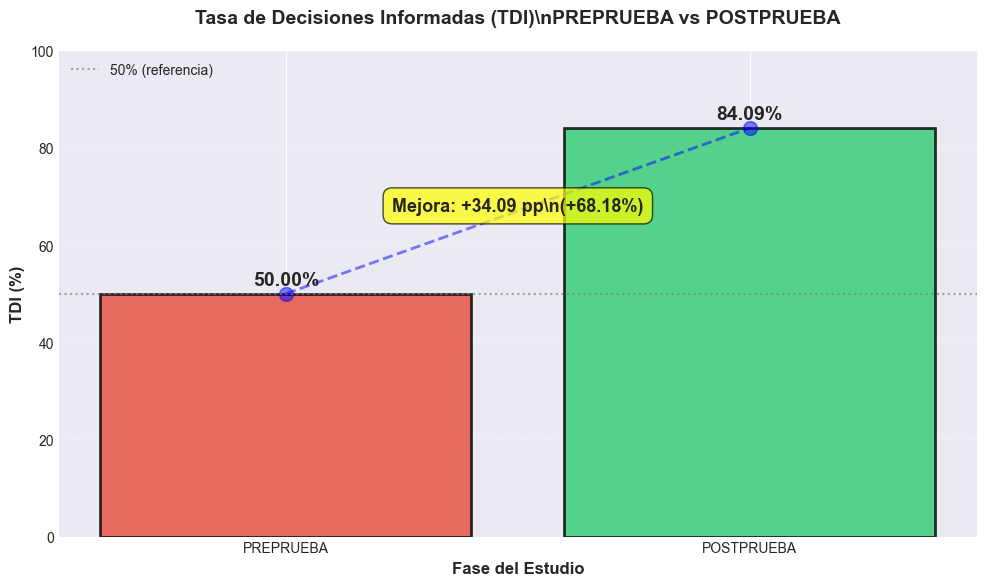

✓ Gráfico de TDI comparativo generado y guardado


In [19]:
# =============================================================================
# 6. VISUALIZACIÓN: TDI PREPRUEBA VS POSTPRUEBA
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 6))

# Datos
fases = ['PREPRUEBA', 'POSTPRUEBA']
tdis = [tdi_pre, tdi_post]
colores = ['#E74C3C', '#2ECC71']

# Crear barras
barras = ax.bar(fases, tdis, color=colores, alpha=0.8, edgecolor='black', linewidth=2)

# Valores sobre las barras
for i, (bar, tdi) in enumerate(zip(barras, tdis)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{tdi:.2f}%',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Línea de conexión
ax.plot([0, 1], tdis, 'b--', linewidth=2, alpha=0.5, marker='o', markersize=10)

# Anotación de mejora
ax.annotate(f'Mejora: {mejora_absoluta:+.2f} pp\\n({mejora_porcentual:+.2f}%)',
            xy=(0.5, np.mean(tdis)), fontsize=13, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            ha='center')

# Personalización
ax.set_title('Tasa de Decisiones Informadas (TDI)\\nPREPRUEBA vs POSTPRUEBA',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('TDI (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Fase del Estudio', fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Línea de referencia en 50%
ax.axhline(y=50, color='gray', linestyle=':', linewidth=1.5, alpha=0.7, label='50% (referencia)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('resultados_tdi/01_tdi_comparativo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico de TDI comparativo generado y guardado")

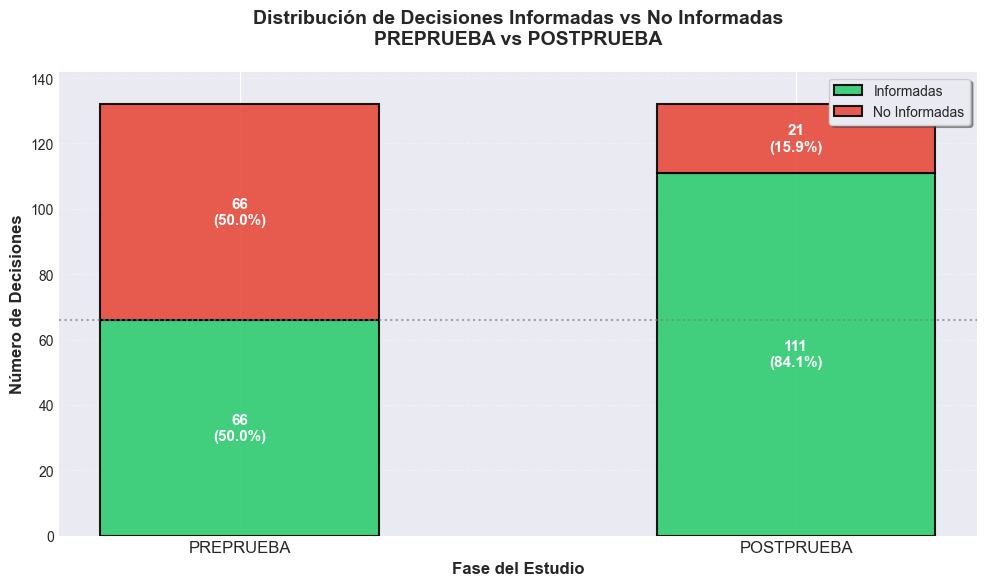

✓ Gráfico de barras apiladas generado y guardado


In [20]:
# =============================================================================
# 6.2. GRÁFICO 2: BARRAS APILADAS (Decisiones Informadas vs No Informadas)
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 6))

# Datos para barras apiladas
fases = ['PREPRUEBA', 'POSTPRUEBA']
informadas = [n_informadas_pre, n_informadas_post]
no_informadas = [n_no_informadas_pre, n_no_informadas_post]

# Posiciones de las barras
x_pos = np.arange(len(fases))
width = 0.5

# Crear barras apiladas
p1 = ax.bar(x_pos, informadas, width, label='Informadas', 
            color='#2ECC71', alpha=0.9, edgecolor='black', linewidth=1.5)
p2 = ax.bar(x_pos, no_informadas, width, bottom=informadas, 
            label='No Informadas', color='#E74C3C', alpha=0.9, 
            edgecolor='black', linewidth=1.5)

# Agregar valores en cada segmento
for i, (inf, no_inf) in enumerate(zip(informadas, no_informadas)):
    # Valor informadas
    ax.text(i, inf/2, f'{inf}\n({inf/n_total*100:.1f}%)', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')
    # Valor no informadas
    ax.text(i, inf + no_inf/2, f'{no_inf}\n({no_inf/n_total*100:.1f}%)', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# Personalización
ax.set_title('Distribución de Decisiones Informadas vs No Informadas\nPREPRUEBA vs POSTPRUEBA',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Número de Decisiones', fontsize=12, fontweight='bold')
ax.set_xlabel('Fase del Estudio', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(fases, fontsize=12)
ax.set_ylim(0, n_total + 10)
ax.legend(loc='upper right', frameon=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Línea de referencia
ax.axhline(y=n_total/2, color='gray', linestyle=':', linewidth=1.5, alpha=0.7)

plt.tight_layout()
plt.savefig('resultados_tdi/02_barras_apiladas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico de barras apiladas generado y guardado")

In [21]:
# =============================================================================
# 7. RESUMEN EJECUTIVO
# =============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO: ANÁLISIS ESTADÍSTICO DEL INDICADOR TDI")
print("="*80)

print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║              INDICADOR: TASA DE DECISIONES INFORMADAS (TDI)                  ║
║          (Decisiones operativas basadas en análisis de datos)                ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 DISEÑO DEL ESTUDIO:
   • Tipo: Estudio cuasi-experimental con mediciones pre-post
   • Tamaño muestral: n = {n_total} decisiones pareadas
   • Variables: Binaria (0 = sin análisis, 1 = con análisis)
   • Periodo PREPRUEBA: Noviembre-Diciembre 2024 (ANTES del sistema)
   • Periodo POSTPRUEBA: Enero-Febrero 2025 (DESPUÉS del sistema)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 INDICADOR TDI:

   PREPRUEBA (ANTES del sistema):
   • Total decisiones:          {n_total}
   • Decisiones informadas:     {n_informadas_pre}
   • Decisiones NO informadas:  {n_no_informadas_pre}
   • TDI PREPRUEBA:             {tdi_pre:.2f}%

   POSTPRUEBA (DESPUÉS del sistema):
   • Total decisiones:          {n_total}
   • Decisiones informadas:     {n_informadas_post}
   • Decisiones NO informadas:  {n_no_informadas_post}
   • TDI POSTPRUEBA:            {tdi_post:.2f}%

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 MEJORA OBSERVADA:

   • Mejora absoluta:           {mejora_absoluta:+.2f} puntos porcentuales
   • Mejora relativa:           {mejora_porcentual:+.2f}%
   • N° decisiones mejoradas:   {n01 - n10:+d} (mejoras: {n01}, empeoramientos: {n10})
   • IC 95%:                    [{ic_inferior:.2f}%, {ic_superior:.2f}%]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🔬 ANÁLISIS INFERENCIAL:

   Prueba Estadística: McNemar (datos binarios pareados)
   • Estadístico:       {result.statistic:.4f}
   • p-valor:           {result.pvalue:.6f}
   • Nivel α:           {alpha}
   • Decisión:          {'RECHAZAR H0' if result.pvalue < alpha else 'NO RECHAZAR H0'}

   Tamaño del Efecto (h de Cohen para proporciones):
   • h de Cohen:        {h_cohen:.4f}
   • Interpretación:    {interpretar_h_cohen(h_cohen)}

   Tabla de Cambios (Transiciones):
   • No Informada → Informada (mejoras):     {n01} decisiones
   • Informada → No Informada (empeoramientos): {n10} decisiones
   • Sin cambio (No → No):                    {n00} decisiones
   • Sin cambio (Sí → Sí):                    {n11} decisiones

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ CONCLUSIONES:
""")

if result.pvalue < alpha:
    print(f"""
   1. Existe evidencia estadísticamente SIGNIFICATIVA (p = {result.pvalue:.6f} < 0.05)
      de que la implementación del sistema AUMENTÓ la tasa de decisiones informadas.

   2. El TDI aumentó de {tdi_pre:.2f}% a {tdi_post:.2f}%, lo que representa
      una mejora de {mejora_absoluta:.2f} puntos porcentuales ({mejora_porcentual:.2f}% de incremento relativo).

   3. El tamaño del efecto es {interpretar_h_cohen(h_cohen)}, lo que indica un impacto
      {'SUSTANCIAL' if abs(h_cohen) >= 0.8 else 'MODERADO' if abs(h_cohen) >= 0.5 else 'APRECIABLE'}
      desde el punto de vista práctico.

   4. Con un 95% de confianza, el verdadero aumento en TDI se encuentra
      entre {ic_inferior:.2f}% y {ic_superior:.2f}%.

   5. Análisis de transiciones: {n01} decisiones MEJORARON (pasaron de no informadas
      a informadas), mientras que solo {n10} EMPEORARON, resultando en una mejora
      neta de {n01 - n10} decisiones.

   6. Estos resultados VALIDAN LA HIPÓTESIS DE INVESTIGACIÓN, demostrando que
      el sistema implementado mejora significativamente la calidad de la toma de
      decisiones operativas al promover el análisis previo basado en datos.
""")
else:
    print(f"""
   1. NO existe evidencia estadísticamente significativa (p = {result.pvalue:.6f} ≥ 0.05)
      de que el sistema haya aumentado la tasa de decisiones informadas.

   2. Aunque se observa una mejora numérica de {mejora_absoluta:.2f} puntos porcentuales,
      esta diferencia podría deberse al azar o a otros factores no controlados.

   3. Se recomienda:
      - Aumentar el tamaño muestral si es posible
      - Realizar un seguimiento más prolongado
      - Analizar posibles factores confusores
""")

print("="*80)
print(f"\nFecha del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)

print("\n✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print(f"\n📊 Resumen de resultados:")
print(f"   • n = {n_total} decisiones pareadas")
print(f"   • TDI PREPRUEBA: {tdi_pre:.2f}%")
print(f"   • TDI POSTPRUEBA: {tdi_post:.2f}%")
print(f"   • Mejora: {mejora_absoluta:+.2f} pp ({mejora_porcentual:+.2f}%)")
print(f"   • p-valor: {result.pvalue:.6f}")
print(f"   • Significancia: {'SÍ (p < 0.05)' if result.pvalue < alpha else 'NO (p ≥ 0.05)'}")
print(f"   • Tamaño efecto: {interpretar_h_cohen(h_cohen)}")
print("\n" + "="*80)


RESUMEN EJECUTIVO: ANÁLISIS ESTADÍSTICO DEL INDICADOR TDI

╔══════════════════════════════════════════════════════════════════════════════╗
║              INDICADOR: TASA DE DECISIONES INFORMADAS (TDI)                  ║
║          (Decisiones operativas basadas en análisis de datos)                ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 DISEÑO DEL ESTUDIO:
   • Tipo: Estudio cuasi-experimental con mediciones pre-post
   • Tamaño muestral: n = 132 decisiones pareadas
   • Variables: Binaria (0 = sin análisis, 1 = con análisis)
   • Periodo PREPRUEBA: Noviembre-Diciembre 2024 (ANTES del sistema)
   • Periodo POSTPRUEBA: Enero-Febrero 2025 (DESPUÉS del sistema)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 INDICADOR TDI:

   PREPRUEBA (ANTES del sistema):
   • Total decisiones:          132
   • Decisiones informadas:     66
   • Decisiones NO informadas:  66
   • TDI PREPRUEBA:             50.00%

   POS

In [22]:
# =============================================================================
# 8. EXPORTAR RESUMEN A ARCHIVO TXT
# =============================================================================

# Crear contenido del resumen
resumen_contenido = f"""
================================================================================
ANÁLISIS ESTADÍSTICO: TASA DE DECISIONES INFORMADAS (TDI)
================================================================================
Fecha del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Tesis de Ingeniería - Indicador 3

================================================================================
1. INFORMACIÓN DEL ESTUDIO
================================================================================

Diseño: Estudio cuasi-experimental con mediciones pre-post
Tamaño muestral: n = {n_total} decisiones pareadas
Variables: Binaria (0 = sin análisis, 1 = con análisis)
Periodo PREPRUEBA: Noviembre-Diciembre 2024 (ANTES del sistema)
Periodo POSTPRUEBA: Enero-Febrero 2025 (DESPUÉS del sistema)

================================================================================
2. RESULTADOS DEL INDICADOR TDI (%)
================================================================================

PREPRUEBA (ANTES del sistema):
  • Total decisiones:          {n_total}
  • Decisiones informadas:     {n_informadas_pre}
  • Decisiones NO informadas:  {n_no_informadas_pre}
  • TDI PREPRUEBA:             {tdi_pre:.2f}%

POSTPRUEBA (DESPUÉS del sistema):
  • Total decisiones:          {n_total}
  • Decisiones informadas:     {n_informadas_post}
  • Decisiones NO informadas:  {n_no_informadas_post}
  • TDI POSTPRUEBA:            {tdi_post:.2f}%

MEJORA OBSERVADA:
  • Mejora absoluta:           {mejora_absoluta:+.2f} puntos porcentuales
  • Mejora relativa:           {mejora_porcentual:+.2f}%
  • N° decisiones mejoradas:   {n_informadas_post - n_informadas_pre:+d}

================================================================================
3. ANÁLISIS POR TIPO DE DECISIÓN
================================================================================

{df_tabla_tipos.to_string(index=False)}

TIPO CON MAYOR MEJORA: {tipo_max_mejora} ({mejora_max} pp)

================================================================================
4. ANÁLISIS INFERENCIAL (Prueba McNemar)
================================================================================

Tabla de Contingencia 2x2:
                     POSTPRUEBA
                 No Informada  Informada
PREPRUEBA  No          {n00:>3d}          {n01:>3d}
           Sí          {n10:>3d}          {n11:>3d}

Interpretación:
  • n00 = {n00}: Decisiones NO informadas que SIGUEN sin serlo
  • n01 = {n01}: Decisiones NO informadas → AHORA SÍ informadas (MEJORA)
  • n10 = {n10}: Decisiones SÍ informadas → AHORA NO informadas (EMPEORAMIENTO)
  • n11 = {n11}: Decisiones SÍ informadas que SIGUEN siéndolo

Hipótesis:
  H0: P(Informada_POST) = P(Informada_PRE)  (no hay cambio)
  H1: P(Informada_POST) ≠ P(Informada_PRE)  (hay cambio significativo)
  Nivel de significancia: α = {alpha}

Resultados:
  • Estadístico:   {result.statistic:.4f}
  • p-valor:       {result.pvalue:.6f}
  • Decisión:      {'RECHAZAR H0' if result.pvalue < alpha else 'NO RECHAZAR H0'}

================================================================================
5. TAMAÑO DEL EFECTO E INTERVALOS DE CONFIANZA
================================================================================

h de Cohen para proporciones:
  • Proporción PREPRUEBA:  {p_pre:.4f} ({tdi_pre:.2f}%)
  • Proporción POSTPRUEBA: {p_post:.4f} ({tdi_post:.2f}%)
  • h de Cohen:            {h_cohen:.4f}
  • Interpretación:        {interpretar_h_cohen(h_cohen)}

Intervalo de Confianza 95%:
  • Diferencia observada:  {diff_prop * 100:.2f} puntos porcentuales
  • Error estándar:        {se_diff * 100:.2f} pp
  • IC 95%:                [{ic_inferior:.2f}%, {ic_superior:.2f}%]

================================================================================
6. CONCLUSIONES
================================================================================

{'✅ RECHAZAMOS H0 (p = ' + f'{result.pvalue:.6f}' + ' < α = ' + f'{alpha}' + ')' if result.pvalue < alpha else '❌ NO RECHAZAMOS H0'}

{'Existe evidencia estadísticamente SIGNIFICATIVA de que la implementación del' if result.pvalue < alpha else 'NO existe evidencia estadísticamente significativa de que el'}
{'sistema AUMENTÓ la tasa de decisiones informadas.' if result.pvalue < alpha else 'sistema haya aumentado la tasa de decisiones informadas.'}

El TDI aumentó de {tdi_pre:.2f}% a {tdi_post:.2f}%, lo que representa
una mejora de {mejora_absoluta:.2f} puntos porcentuales ({mejora_porcentual:.2f}% de incremento relativo).

El tamaño del efecto es {interpretar_h_cohen(h_cohen)}, indicando un impacto
{'SUSTANCIAL' if abs(h_cohen) >= 0.8 else 'MODERADO' if abs(h_cohen) >= 0.5 else 'APRECIABLE' if abs(h_cohen) >= 0.2 else 'LIMITADO'}
desde el punto de vista práctico.

Análisis de transiciones: {n01} decisiones MEJORARON (pasaron de no informadas
a informadas), mientras que {n10} EMPEORARON, resultando en una mejora neta
de {n01 - n10} decisiones.

{'Estos resultados VALIDAN LA HIPÓTESIS DE INVESTIGACIÓN, demostrando que' if result.pvalue < alpha else 'Se recomienda realizar un seguimiento más prolongado y'}
{'el sistema implementado mejora significativamente la calidad de la toma de' if result.pvalue < alpha else 'analizar posibles factores confusores para determinar si'}
{'decisiones operativas al promover el análisis previo basado en datos.' if result.pvalue < alpha else 'existe un efecto real del sistema implementado.'}

================================================================================
ARCHIVOS GENERADOS
================================================================================

1. resultados_tdi/01_tdi_comparativo.png - Gráfico comparativo TDI
2. resultados_tdi/02_barras_apiladas.png - Distribución informadas/no informadas
3. resultados_tdi/resumen_tdi.txt - Este archivo

================================================================================
FIN DEL ANÁLISIS
================================================================================
"""

# Guardar archivo
archivo_resumen = 'resultados_tdi/resumen_tdi.txt'
with open(archivo_resumen, 'w', encoding='utf-8') as f:
    f.write(resumen_contenido)

print("\n" + "="*80)
print("ARCHIVO RESUMEN GENERADO")
print("="*80)
print(f"\n✓ Archivo guardado: {archivo_resumen}")
print(f"✓ Tamaño: {len(resumen_contenido)} caracteres")
print(f"✓ Contenido: Análisis completo con todos los hallazgos")
print("\n" + "="*80)
print("\n🎉 ANÁLISIS COMPLETADO - TODOS LOS ARCHIVOS GENERADOS")
print("\n📁 Archivos en carpeta 'resultados_tdi/':")
print("   1. 01_tdi_comparativo.png")
print("   2. 02_barras_apiladas.png")
print("   3. resumen_tdi.txt")
print("\n" + "="*80)


ARCHIVO RESUMEN GENERADO

✓ Archivo guardado: resultados_tdi/resumen_tdi.txt
✓ Tamaño: 5156 caracteres
✓ Contenido: Análisis completo con todos los hallazgos


🎉 ANÁLISIS COMPLETADO - TODOS LOS ARCHIVOS GENERADOS

📁 Archivos en carpeta 'resultados_tdi/':
   1. 01_tdi_comparativo.png
   2. 02_barras_apiladas.png
   3. resumen_tdi.txt

